## **DIABETES DETECTION USING PYTHON:**

**A project by : Sharanya Sarkar**

*Importing the Dependencies:*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




In [ ]:
import sklearn as sk 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

*Data Collection and Analysis:*

In [ ]:
#loading the dataset to a pandas DataFrame

diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
#printing the first 5 rows of our dataset 

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# printing the number of rows and columns present in the dataset:

diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.isnull().values.any()

False

In [ ]:
diabetes_dataset = diabetes_dataset.dropna()

In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
# Statistical measures of the data

diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:

diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 ---> Non-Diabetic

1 ---> Diabetic

This means there are 500 negative cases and 268 positive cases.

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#seperating the data and labels:

X= diabetes_dataset.drop(columns='Outcome' , axis=1)

Y= diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization:

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:

standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# *DATA VISUALIZATION :*

Negative (0): 500
Positive(1): 268


<function matplotlib.pyplot.show>

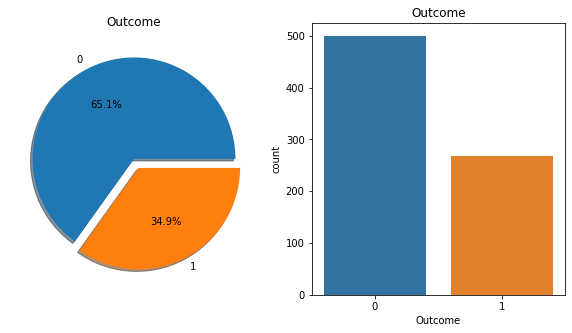

In [ ]:
# outcome count plot 
f,ax=plt.subplots(1,2,figsize=(10,5))
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

sns.countplot('Outcome', data = diabetes_dataset,ax=ax[1])
ax[1].set_title('Outcome')
N,P=diabetes_dataset['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive(1):',P)
plt.grid
plt.show

Histograms 

This chart shows us that 65.1% of our total dataset contains negative cases and remaining 34.9% are positive cases 

<function matplotlib.pyplot.show>

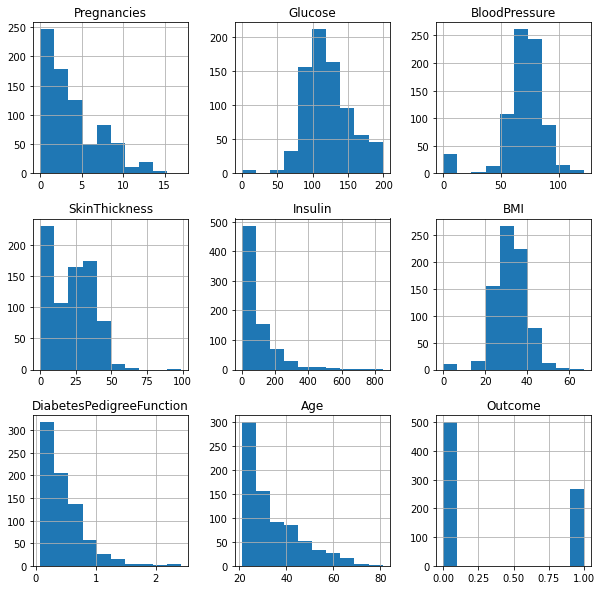

In [ ]:
#Histogram of Each feature 

diabetes_dataset.hist(bins=10, figsize =(10,10))
plt.show

# **Analyzing the relationships between the Variables - Corrrelation Analysis**

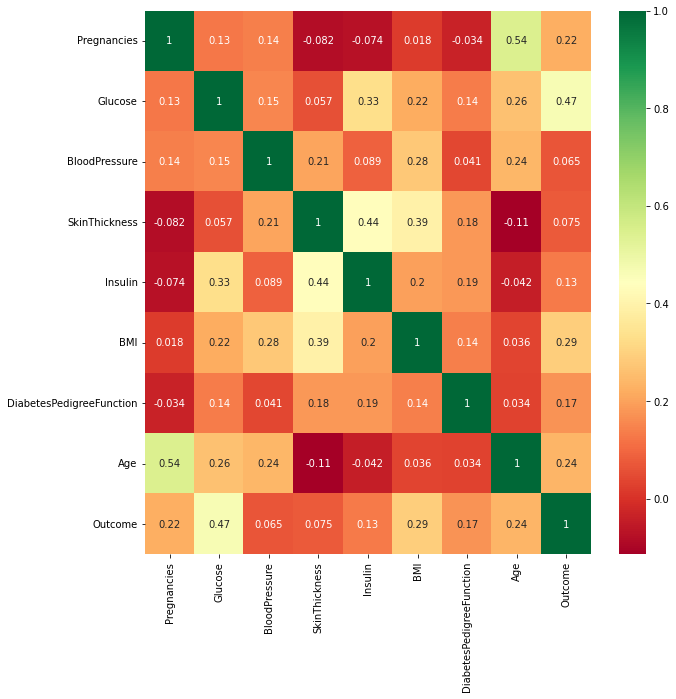

In [ ]:
import seaborn as sns
#get correlatation of each features in dataset 
corrmat=diabetes_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

#plot heatmap

g=sns.heatmap(diabetes_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Train test split

X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , stratify=Y, random_state=2)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(768, 8) (614, 8) (154, 8)


# Appying the different classification Algorithmns:

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
#KNeighbors Classifier (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
#Naive-Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#Support Vector Machine Classifier

classifier = svm.SVC(kernel='linear')

#training 

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## *Making Predictions and Model Evaluations:*

In [ ]:
#Making prediction on test using Logistic Regression:

lr_pred=lr.predict(X_test)

#Model evaluation - Train and Test Score:

from sklearn.metrics import accuracy_score

print('Train Accuracy of Logistic Regression', lr.score(X_train,Y_train)*100)
print('Accuracy(Test)score of Logistic Regression)',lr.score(X_test,Y_test)*100)
print('Accuracy score of Logistic Regression)',accuracy_score(Y_test,lr_pred)*100)

Train Accuracy of Logistic Regression 78.33876221498372
Accuracy(Test)score of Logistic Regression) 75.97402597402598
Accuracy score of Logistic Regression) 75.97402597402598


In [ ]:
#Making prediction on test using KNN

knn_pred = knn.predict(X_test)

#Model evaluation - Train and Test Score:



print('Train Accuracy of KNN', knn.score(X_train,Y_train)*100)
print('Accuracy(Test)score of KNN)',knn.score(X_test,Y_test)*100)
print('Accuracy score of KNN)',accuracy_score(Y_test,knn_pred)*100)

Train Accuracy of KNN 82.89902280130293
Accuracy(Test)score of KNN) 72.07792207792207
Accuracy score of KNN) 72.07792207792207


In [ ]:

#Making prediction on test using Naive-Bayes Classifier

nb_pred = nb.predict(X_test)


#Model evaluation - Train and Test Score:



print('Train Accuracy of Naive-Bayes Classifier)', nb.score(X_train,Y_train)*100)
print('Accuracy(Test)score of Naive-Bayes Classifier)',nb.score(X_test,Y_test)*100)
print('Accuracy score of Naive-Bayes Classifier)',accuracy_score(Y_test,nb_pred)*100)

Train Accuracy of Naive-Bayes Classifier) 75.57003257328991
Accuracy(Test)score of Naive-Bayes Classifier) 77.27272727272727
Accuracy score of Naive-Bayes Classifier) 77.27272727272727


In [ ]:
#Making prediction on test using SVM

#Accuracy score on trainig data

X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy Score of the training data', training_data_accuracy)


Accuracy Score of the training data 0.7866449511400652


In [ ]:

#Accuracy score on test data

X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy Score of the test data', test_data_accuracy)

Accuracy Score of the test data 0.7727272727272727


In [ ]:



#Making prediction on test using Decision tree

dt_pred = dt.predict(X_test)

#Model evaluation - Train and Test Score:



print('Train Accuracy of Decision Tree)', dt.score(X_train,Y_train)*100)
print('Accuracy(Test)score of Decision Tree)',dt.score(X_test,Y_test)*100)
print('Accuracy score of Decision Tree)',accuracy_score(Y_test,dt_pred)*100)

Train Accuracy of Decision Tree) 100.0
Accuracy(Test)score of Decision Tree) 70.77922077922078
Accuracy score of Decision Tree) 70.77922077922078


In [ ]:

#Making prediction on test using Random Forest Classifier

rf_pred = rf.predict(X_test)

#Model evaluation - Train and Test Score:



print('Train Accuracy of Random Forest)', rf.score(X_train,Y_train)*100)
print('Accuracy(Test)score of Random Forest)',rf.score(X_test,Y_test)*100)
print('Accuracy score of Random Forest)',accuracy_score(Y_test,rf_pred)*100)

Train Accuracy of Random Forest) 100.0
Accuracy(Test)score of Random Forest) 75.97402597402598
Accuracy score of Random Forest) 75.97402597402598


# CONFUSION MATRIX :
It is used to describe the performance of a classification problem .
It visualizes the accuracy of the classifier by comparing predicted values with actual values.

The terms used in Confusion metrics are True Positive , False Positive , True Negative and False Negative.



*   **True Positive** - Predicted value is positive as well as its label
*   **False Positive** - Predicted value is positive while the actual value is negative . It also called Type I Error 


*   **True Negative**- Predicted value and actual label are both negative.
*   **False Negative** - Predicted value is negative but the actual label is positive. Its called Type II Error.





# Confusion Matrix of Logistic Regression:

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#confusion matrix of Logistic Regression
cm=confusion_matrix(Y_test,lr_pred)
cm

array([[89, 11],
       [26, 28]])

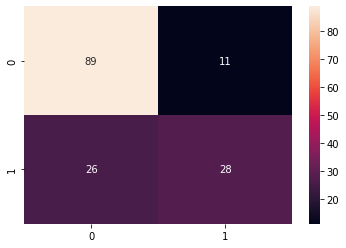

In [ ]:
sns.heatmap(confusion_matrix(Y_test,lr_pred),annot=True,fmt="d")

In [ ]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [ ]:
TN,FP,FN,TP

(89, 11, 26, 28)

In [ ]:

#Making the Confusioon Matrix of Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,lr_pred)

print('TN- True Negative {}'.format(cm[0,0]))
print('FP- False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0]))
print('TP- True Positive {}'.format(cm[1,1]))

print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN- True Negative 89
FP- False Positive 11
FN- False Negative 26
TP- True Positive 28
Accuracy rate 75.97402597402598
Misclassification rate 24.025974025974026


<function matplotlib.pyplot.show>

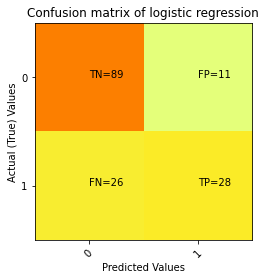

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
class_names=['0','1']
plt.title('Confusion matrix of logistic regression')
plt.ylabel('Actual (True) Values')
plt.xlabel('Predicted Values')
tick_marks =np.arange(len(class_names))
plt.xticks(tick_marks,class_names,rotation=45)
plt.yticks(tick_marks,class_names)
s=[['TN','FP'],['FN','TP']]

for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+ "="+str(cm[i][j]))
plt.show



In [ ]:
pd.crosstab(Y_test,lr_pred,margins=False)

col_0,0,1
Outcome,,
0,89,11
1,26,28


In [ ]:
pd.crosstab(Y_test,lr_pred,margins=True)

col_0,0,1,All
Outcome,,,
0,89,11,100
1,26,28,54
All,115,39,154


# Precision- PPV (Positive Predicted Value )

It is the ratio of correctly predicted observations (TP) to the total no. of predicted positive observations (TP+FP)

P= TP/(TP+FP)

In [ ]:
TP,FP

(28, 11)

In [ ]:
P=TP/(TP+FP)
P

0.717948717948718

In [ ]:
28/(28+11)

0.717948717948718

In [ ]:
#print the precision score

precision_Score= TP/float(TP + FP)*100
print('Precision score: {0:0.4f}'.format(precision_Score))


Precision score: 71.7949


In [ ]:
print('Classification_Report of Logistic Regression \n',classification_report(Y_test,lr_pred,digits=4))

Classification_Report of Logistic Regression 
               precision    recall  f1-score   support

           0     0.7739    0.8900    0.8279       100
           1     0.7179    0.5185    0.6022        54

    accuracy                         0.7597       154
   macro avg     0.7459    0.7043    0.7150       154
weighted avg     0.7543    0.7597    0.7487       154



# False Positive Rate (FPR)

In [ ]:
FPR = FP/float(FP+TN)*100
print('False Positive Rate:{0:0.4f}'.format(FPR))

False Positive Rate:11.0000


In [ ]:
FP,TN

(11, 89)

In [ ]:
11/(11+89)

0.11

#Specificity 

In [ ]:
specificity=TN/(TN+FP)*100
print('Specificity {0:0.4f}'.format(specificity))

Specificity 89.0000


#F1 Score

In [ ]:
from sklearn.metrics import f1_score
print('the F1 score of macro :',f1_score(Y_test,lr_pred)*100)

the F1 score of macro : 60.21505376344085


# ROC Curve and ROC-AUC for LR Model

In [ ]:
#Area under Curve
auc= roc_auc_score(Y_test,lr_pred)
print('ROC AUCC Score of Logistic Regression' , auc)

ROC AUCC Score of Logistic Regression 0.7042592592592593


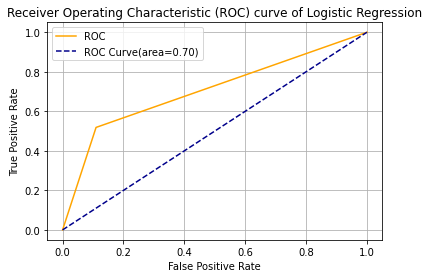

In [ ]:

fpr,tpr,thresholds= roc_curve(Y_test,lr_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve of Logistic Regression')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix of KNN

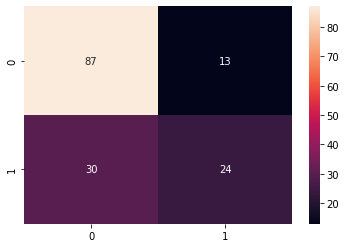

In [ ]:
sns.heatmap(confusion_matrix(Y_test,knn_pred),annot=True,fmt="d")

In [ ]:
#Making the Confusion Matrix for KNN 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,knn_pred)

print('TN- True Negative {}'.format(cm[0,0]))
print('FP- False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0]))
print('TP- True Positive {}'.format(cm[1,1]))

print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN- True Negative 87
FP- False Positive 13
FN- False Negative 30
TP- True Positive 24
Accuracy rate 72.07792207792207
Misclassification rate 27.92207792207792


In [ ]:
#Classification Report of KNN

print('Classification_Report of KNN \n',classification_report(Y_test,knn_pred,digits=4))

Classification_Report of KNN 
               precision    recall  f1-score   support

           0     0.7436    0.8700    0.8018       100
           1     0.6486    0.4444    0.5275        54

    accuracy                         0.7208       154
   macro avg     0.6961    0.6572    0.6647       154
weighted avg     0.7103    0.7208    0.7056       154



# Area Under the Curve AUC for KNN

In [ ]:
#Area under the curve 
auc= roc_auc_score(Y_test,knn_pred)
print('ROC AUCC Score of KNN' , auc)

ROC AUCC Score of KNN 0.6572222222222222


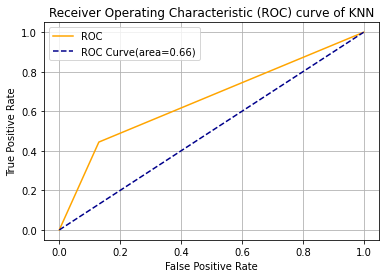

In [ ]:
fpr,tpr,thresholds= roc_curve(Y_test,knn_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve of KNN')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix for Naive Bayes Classification

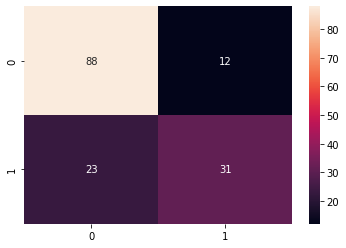

In [ ]:
sns.heatmap(confusion_matrix(Y_test,nb_pred),annot=True,fmt="d")

In [ ]:
#Making the Confusion Matrix for Naive Bayes Classification 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,nb_pred)

print('TN- True Negative {}'.format(cm[0,0]))
print('FP- False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0]))
print('TP- True Positive {}'.format(cm[1,1]))

print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN- True Negative 88
FP- False Positive 12
FN- False Negative 23
TP- True Positive 31
Accuracy rate 77.27272727272727
Misclassification rate 22.727272727272727


In [ ]:
#Classification Report of Naive Bayes Classification

print('Classification_Report of Naive Bayes Classification \n',classification_report(Y_test,nb_pred,digits=4))

Classification_Report of Naive Bayes Classification 
               precision    recall  f1-score   support

           0     0.7928    0.8800    0.8341       100
           1     0.7209    0.5741    0.6392        54

    accuracy                         0.7727       154
   macro avg     0.7569    0.7270    0.7366       154
weighted avg     0.7676    0.7727    0.7658       154



## Area under the curve for NB Model:

In [ ]:
#Area under the curve 
auc= roc_auc_score(Y_test,nb_pred)
print('ROC AUC Score of Naive Bayes Classifier' , auc)

ROC AUC Score of Naive Bayes Classifier 0.7270370370370369


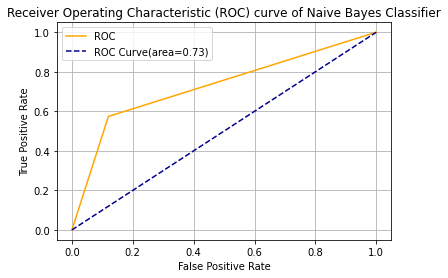

In [ ]:
fpr,tpr,thresholds= roc_curve(Y_test,nb_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve of Naive Bayes Classifier')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix for Decision Tree

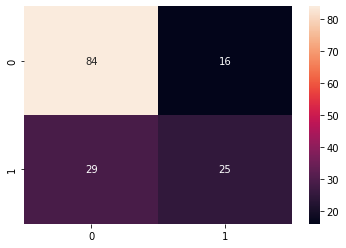

In [ ]:
sns.heatmap(confusion_matrix(Y_test,dt_pred),annot=True,fmt="d")

In [ ]:
#Making the Confusion Matrix for Decision Tree 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,dt_pred)

print('TN- True Negative {}'.format(cm[0,0]))
print('FP- False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0]))
print('TP- True Positive {}'.format(cm[1,1]))

print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN- True Negative 84
FP- False Positive 16
FN- False Negative 29
TP- True Positive 25
Accuracy rate 70.77922077922078
Misclassification rate 29.22077922077922


In [ ]:
#Classification Report of Decision Tree

print('Classification_Report of Decision Tree \n',classification_report(Y_test,dt_pred,digits=4))

Classification_Report of Decision Tree 
               precision    recall  f1-score   support

           0     0.7434    0.8400    0.7887       100
           1     0.6098    0.4630    0.5263        54

    accuracy                         0.7078       154
   macro avg     0.6766    0.6515    0.6575       154
weighted avg     0.6965    0.7078    0.6967       154



In [ ]:
#Area under the curve 
auc= roc_auc_score(Y_test,dt_pred)
print('ROC AUCC Score of Decision Tree' , auc)

ROC AUCC Score of Decision Tree 0.6514814814814816


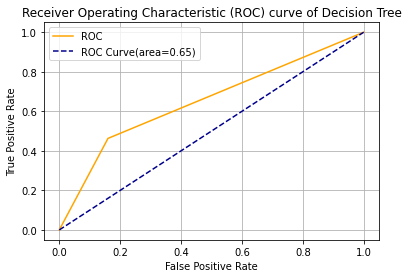

In [ ]:
fpr,tpr,thresholds= roc_curve(Y_test,dt_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve of Decision Tree')
plt.legend()
plt.grid()
plt.show()

## Confusion Matrix for Random Forest

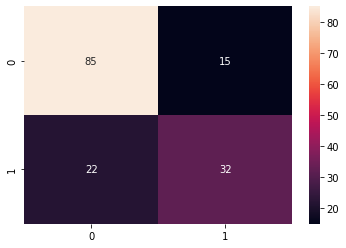

In [ ]:
sns.heatmap(confusion_matrix(Y_test,rf_pred),annot=True,fmt="d")

In [ ]:
#Making the Confusion Matrix for Random Forest 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,rf_pred)

print('TN- True Negative {}'.format(cm[0,0]))
print('FP- False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0]))
print('TP- True Positive {}'.format(cm[1,1]))

print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN- True Negative 85
FP- False Positive 15
FN- False Negative 22
TP- True Positive 32
Accuracy rate 75.97402597402598
Misclassification rate 24.025974025974026


In [ ]:
#Classification Report of Random Forest

print('Classification_Report of Random Forest \n',classification_report(Y_test,rf_pred,digits=4))

Classification_Report of Random Forest 
               precision    recall  f1-score   support

           0     0.7944    0.8500    0.8213       100
           1     0.6809    0.5926    0.6337        54

    accuracy                         0.7597       154
   macro avg     0.7376    0.7213    0.7275       154
weighted avg     0.7546    0.7597    0.7555       154



In [ ]:
#Area under the curve 
auc= roc_auc_score(Y_test,rf_pred)
print('ROC AUCC Score of Random Forest' , auc)

ROC AUCC Score of Random Forest 0.7212962962962962


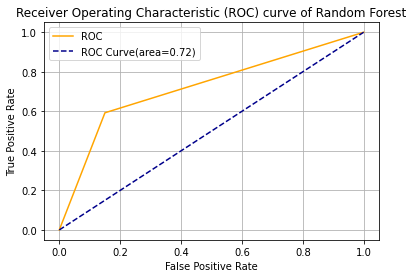

In [ ]:
fpr,tpr,thresholds= roc_curve(Y_test,rf_pred)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve of Random Forest')
plt.legend()
plt.grid()
plt.show()

## Confusion Matrix of SVM 

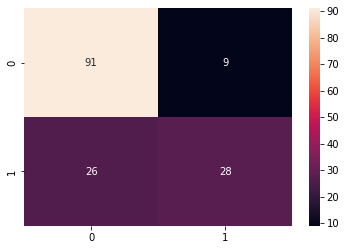

In [ ]:
sns.heatmap(confusion_matrix(Y_test,X_test_prediction),annot=True,fmt="d")

In [ ]:
#Making the Confusion Matrix for SVM 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,X_test_prediction)

print('TN- True Negative {}'.format(cm[0,0]))
print('FP- False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0]))
print('TP- True Positive {}'.format(cm[1,1]))

print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN- True Negative 91
FP- False Positive 9
FN- False Negative 26
TP- True Positive 28
Accuracy rate 77.27272727272727
Misclassification rate 22.727272727272727


In [ ]:

#Classification Report of SVM

print('Classification_Report of Random Forest \n',classification_report(Y_test,X_test_prediction,digits=4))

Classification_Report of Random Forest 
               precision    recall  f1-score   support

           0     0.7778    0.9100    0.8387       100
           1     0.7568    0.5185    0.6154        54

    accuracy                         0.7727       154
   macro avg     0.7673    0.7143    0.7270       154
weighted avg     0.7704    0.7727    0.7604       154



In [ ]:
#Area under the curve 
auc= roc_auc_score(Y_test,X_test_prediction)
print('ROC AUCC Score of SVM' , auc)

ROC AUCC Score of SVM 0.7142592592592593


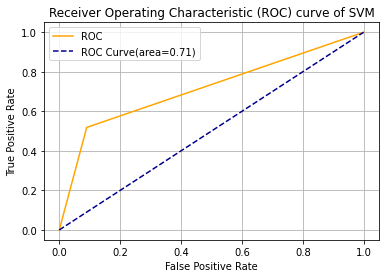

In [ ]:
fpr,tpr,thresholds= roc_curve(Y_test,X_test_prediction)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve of SVM')
plt.legend()
plt.grid()
plt.show()

Comparing the accuracy scores of all the six classification algorithms , we see Naive Bayes Classifier gives us the highest accuracy. So we will build our model using Naive Bayes Classification Trained model.


NOW WE MAKE THE PREDICTIVE SYSTEM:

In [ ]:

input_data=(2,197,70,45,543,30.5,0.158,53)

#changing the input data to numpy array

input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

#standardize the input data 

std_data = scaler.transform(input_data_reshaped)

print(std_data)
#Using Naive Bayes Classifier Trained Model for building our model.

prediction=nb.predict(std_data)
print(prediction)
# here prediction is a list containing the predicted output label:
if(prediction[0]==0):
  print("The person is not diabetic")
else:
  print('The person is diabetic')



[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]
[1]
The person is diabetic


This shows that our model is working properly and is being able to predict the correct output label for the input data that is being fed to it from the dataset.

## **THE END**